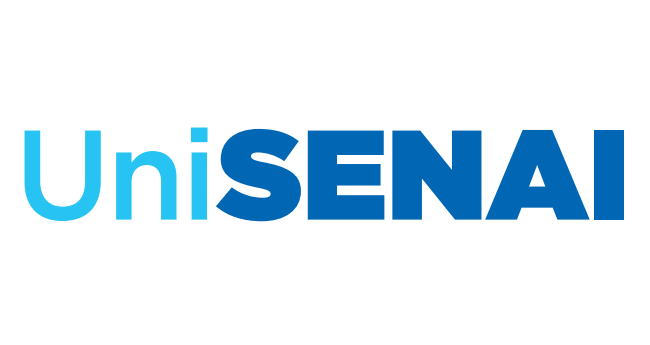
<h1> Pós-Graduação em Ciência de Dados e Inteligência Artificial </h1>

<h1>Unidade Curricular: Modelagem e Armazenamento de Dados</h1>
<h1>Professores: Gustavo Stangherlin Cantarelli, Me. e Paulo Roberto Pasqualotti, Me.</h1>


# 1 - Formatos de Datasets

## 1.1 JSON

O JSON (JavaScript Object Notation) é um modelo para armazenamento e transmissão de informações no formato texto. Pelo fato de ser simples, tem sido bastante utilizado por aplicações Web devido a sua capacidade de estruturar informações de uma forma mais compacta do que a conseguida pelo modelo XML, tornando mais rápido o parsing dessas informações.
O formato ganhou popularidade em serviços da Web, como clientes de email e sites de compras, pois consegue transmitir uma grande quantidade de informações entre o cliente e o servidor usando uma quantidade menor de caracteres.

  Apesar de possuir uma referência ao JavaScript no nome, o funcionamento do JSON é independente de uma linguagem de programação, podendo ser lido, criado e manipulado por várias linguagens modernas como PHP, Python, C++, entre outras.

  A representação das informações em um arquivo JSON é feita por pares compostos de **atributo e valor**. O atributo é indicado entre aspas e serve para identificar o valor. Já o valor pode ser uma string (texto), um número, um booleano (valor lógico), outro par de atributo/valor ou estruturas mais complexas, como arrays (coleção de elementos) e objetos. Os pares são separados por vírgulas, e as chaves delimitam os objetos.

In [ ]:
{
"nome": "Fulano",
"funcao": "Dev",
"salario": 10000.00,
"projetos": ["Saúde", "Educação", "Social"]
}

{'nome': 'Fulano',
 'funcao': 'Dev',
 'salario': 10000.0,
 'projetos': ['Saúde', 'Educação', 'Social']}

In [3]:
# Essa célula é responsável por realizar a conexão com a api ou com alguma tabela local e transformar em um dataframe
import pandas as pd
import requests
import json


#url_bd = 'https://raw.githubusercontent.com/pasqualotti/bancodedados/main/cidades_json.json'
#url_bd = 'https://raw.githubusercontent.com/pasqualotti/bancodedados/main/estado_dados_json.json'
url_bd = 'https://raw.githubusercontent.com/pasqualotti/bancodedados/main/estados_json.json'
#url_bd = 'https://raw.githubusercontent.com/pasqualotti/bancodedados/main/regioes_json.json'
#url_bd = 'https://raw.githubusercontent.com/pasqualotti/bancodedados/main/rios.json'

response = requests.get(url_bd)

if response.status_code == 200:
    try:
        # Remova o BOM manualmente usando replace()
        json_data = response.text.replace('\ufeff', '')
        # Decodifique o JSON manualmente usando json.loads()
        dados_json = json.loads(json_data)
        df = pd.DataFrame(dados_json)
        print(df)
    except Exception as e:
        print("Erro ao decodificar JSON:", e)
        print("Conteúdo da resposta:", response.text)
else:
    print(f"Erro na solicitação. Código de status: {response.status_code}")





    id                 nome  uf        regiao
0    1                 Acre  AC         Norte
1    2              Alagoas  AL      Nordeste
2    3             Amazonas  AM         Norte
3    4                Amapá  AP         Norte
4    5                Bahia  BA      Nordeste
5    6                Ceará  CE      Nordeste
6    7     Distrito Federal  DF  Centro-Oeste
7    8       Espírito Santo  ES       Sudeste
8    9                Goiás  GO  Centro-Oeste
9   10             Maranhão  MA      Nordeste
10  11         Minas Gerais  MG       Sudeste
11  12   Mato Grosso do Sul  MS  Centro-Oeste
12  13          Mato Grosso  MT  Centro-Oeste
13  14                 Pará  PA         Norte
14  15              Paraíba  PB      Nordeste
15  16           Pernambuco  PE      Nordeste
16  17                Piauí  PI      Nordeste
17  18               Paraná  PR           Sul
18  19       Rio de Janeiro  RJ       Sudeste
19  20  Rio Grande do Norte  RN      Nordeste
20  21             Rondônia  RO   

In [ ]:
df.columns

Index(['id', 'nome', 'extensao', 'nascente', 'foz', 'estados'], dtype='object')

In [ ]:
df.values

array([[1, 'Amazonas', 6692, 'Nevado Mismi no Peru', 'Oceano Atlântico',
        'AM, PA, AP'],
       [2, 'Paraná', 4880, 'Rio Grande e Rio Parnaíba', 'Rio da Prata',
        'SP, PR, MS, MG'],
       [3, 'Purus', 3379, 'Colinas do Arco Fitzcarrald, no Peru',
        'Rio Amazonas', 'AC, AM'],
       [4, 'Madeira', 3315,
        'Confluência dos rios Beni e Mamoré, na Bolívia', 'Rio Amazonas',
        'RO, AM'],
       [5, 'São Francisco', 2914, 'Serra da Canastra, em Minas Gerais',
        'Oceano Atlântico', 'MG, BA, PE, SE, AL'],
       [6, 'Negro', 2250, 'Colômbia e Venezuela', 'Rio Amazonas', 'AM'],
       [7, 'Xingu', 2230, 'Mato Grosso (Serra do Roncador)',
        'Rio Amazonas (Pará)', 'MT, PA'],
       [8, 'Araguaia-Tocantins', 4565,
        'Goiás (Serra do Caiapó) e Tocantins (Serra Geral de Goiás)',
        'Oceano Atlântico (Maranhão).', 'GO, MT, TO, PA, MA'],
       [9, 'Tapajós', 1610, 'Mato Grosso',
        'Rio Amazonas em Santarém no Pará.', 'MT, PA'],
       [10, '

Atividade prática


## 1.2 CSV

Os arquivos CSV (*Character-separated values*) servem para armazenar dados tabulares em texto simples. O arquivo é uma sequência de caracteres puros, sem qualquer informação escondida que o computador tenha que processar.

Um arquivo CSV abriga um número de "registros", separados por quebras de linha (cada "registro" permanece numa linha do arquivo) e cada registro possui um ou mais "campos", separados por um delimitador, os mais comuns sendo a vírgula (","), o ponto e vírgula (";") e o caractere "invisível" que surge ao se pressionar a tecla "tab". Arquivos separados por vírgula e ponto e vírgula normalmente recebem a extensão "CSV" e arquivos separados por "tab" a extensão "TSV". Há também bases de dados nesses formatos que recebem a extensão "TXT". Arquivos CSV são simples e funcionam na maior parte das aplicações que lidam com dados estruturados.

Comparando com uma planilha, os "registros" de um arquivo CSV são as linhas e os "campos" são as colunas. Os valores dos "campos" do primeiro "registro", ou seja, da primeira linha, normalmente são os nomes das colunas. Apesar de não existir um padrão internacional para o CSV, suas variações são simples o suficiente para que os aplicativos compatíveis possam consertar facilmente as diferenças.

Se abrirmos um arquivo CSV em um editor de textos, iremos ter algo semelhante ao exemplo:

cidade;uf;regiao<br>
Florianópolis;SC;Sul<br>
São Paulo;SP;Sudeste<br>
Palmas;TO;Norte<br>
Salvador;BA;Nordeste<br>
Porto Alegre;RS;Sul<br>

Diversos datasets em formato CSV podem ser encontrados em [Kaggle Datasets](https://https://www.kaggle.com/datasets).

Exemplo: [Dados Abertos da Agência Nacional do Cinema](https://https://www.kaggle.com/datasets/syfonseca/dados-abertos-ancine?resource=download)

In [ ]:
import pandas as pd
import requests
from io import StringIO

# URL da API que retorna o arquivo CSV
url_bd = 'https://raw.githubusercontent.com/guscant/datasets/main/netflix_titles.csv'

# Fazendo a solicitação HTTP para a API
response = requests.get(url_bd)

if response.status_code == 200:
    try:
        # Lendo os dados CSV da resposta usando StringIO
        # (converte a string em um arquivo "falso" para o pandas ler)
        dados_csv = StringIO(response.text)

        # Criando um DataFrame a partir dos dados CSV
        df = pd.read_csv(dados_csv)

        # Exibindo o DataFrame
        print(df)
    except Exception as e:
        print("Erro ao ler CSV:", e)
else:
    print(f"Erro na solicitação. Código de status: {response.status_code}")

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Atividade prática**

Exercitar a execução dos comandos de leitura dos dados nos dois formatos apresentados. Identificar e registrar quais são as tabelas existentes nos arquivos.
Registrar as tabelas e discutir no grupo possibilidades quanto o tipo de cada atributo e possíveis relacionamentos entre essas tabelas.
Por exemplo, A tabela estado está relacionada à região onde o estado está localizado geograficamente.
* Esses registros das tabelas e atributos, assim como dos possíveis relacionamentos entre elas, serão utilizadas nas próximas atividades.